In [1]:
import pennylane as qml
import numpy as np
from lightning_uq_box.viz_utils import (
    plot_calibration_uq_toolbox,
    plot_predictions_regression,
    plot_toy_regression_data,
    plot_training_metrics,
)
from lightning_uq_box.datamodules import ToyHeteroscedasticDatamodule

In [2]:
dm = ToyHeteroscedasticDatamodule()

X_train, y_train, train_loader, X_test, y_test, test_loader = (
    dm.X_train,
    dm.y_train,
    dm.train_dataloader(),
    dm.X_test,
    dm.y_test,
    dm.test_dataloader(),
)

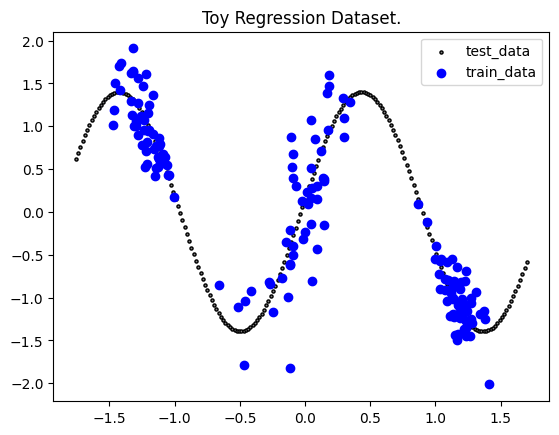

In [3]:
fig = plot_toy_regression_data(X_train, y_train, X_test, y_test)

In [10]:
# Get first element in DataLoader
X_batch, y_batch = next(iter(train_loader))

print(X_batch)
print(y_batch)

X_batch, y_batch = next(iter(train_loader))

print(X_batch)
print(y_batch)

input
target
input
target


# Qubit based neural network

In [30]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def quantum_neural_network(params, x):
    print(x)
    qml.AngleEmbedding(x, wires=[0])

    print(params)
    qml.StronglyEntanglingLayers(params, wires=[0])

    return qml.expval(qml.PauliZ(0))



def cost(params, X, y):
    predictions = [quantum_neural_network(params, x) for x in X]
    return sum((predictions[i] - y[i])**2 for i in range(len(X)))



shape = qml.StronglyEntanglingLayers.shape(n_layers=4, n_wires=1)
var_init = np.random.random(size=shape)

# Optimize the circuit parameters
opt = qml.AdamOptimizer(0.01)

var = var_init
for i in range(100):
    (var, _, _), _cost = opt.step_and_cost(cost, var, X_train, y_train)
    # params = opt.step(lambda v: cost(v, X_train, y_train), params)


predictions = [quantum_neural_network(var, x) for x in X_test]
print(predictions)


/Users/anani/Code/uq-qnn/.venv/lib/python3.9/site-packages/pennylane/math/utils.py:227: UserWarning: Contains tensors of types {'autograd', 'torch'}; dispatch will prioritize TensorFlow, PyTorch, and  Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(


tensor([1.1144])
Autograd ArrayBox with value [[[0.09710128 0.83794491 0.09609841]]

 [[0.97645947 0.4686512  0.97676109]]

 [[0.60484552 0.73926358 0.03918779]]

 [[0.28280696 0.12019656 0.2961402 ]]]


TypeError: object of type 'numpy.complex128' has no len()